Tasks:
- Implement TD(0), n-step TD and TD(lambda) in context of /SARSAQlearning: .
    - Implement forward return, don't use traces
    - and see which one learns the optimal qvalue the fastest
    - These would be baselines that we compare with
    - Do offline updating as that'd be easier to comprehend
- Have the optimal qvalue stored somewhere
- "I would avoid traces as they may raise question about the bias due to them"

Key ideas:
- Temporal coherence helps massively if the time interval on your MDP is very slow. You many have to take lots of similar actions in a short interval of time. 



Need to implement SARSA(lambda) in forward, offline fashion
- Decide if I write from scratch or take it from somewhere
- If I'm writing find where I should start


In [1]:
%reload_ext autoreload

In [2]:
from envs.ring_chain import RingChain
from agent import AgentNstepSARSA
from agent import AgentSARSA
import numpy as np
import pdb
import matplotlib.pyplot as plt

In [3]:
env = RingChain(horizon=10000)


## N-step SARSA

ep = 0
t, eps =  0 0.4999000099993334


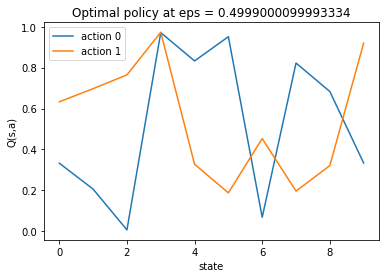

t, eps =  1000 0.4523282343239472


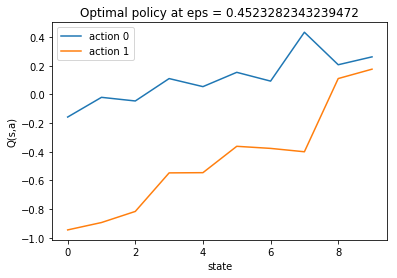

t, eps =  2000 0.40928351165044485


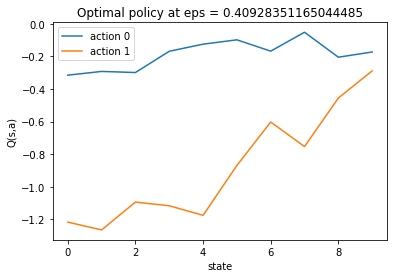

t, eps =  3000 0.3703350359264791


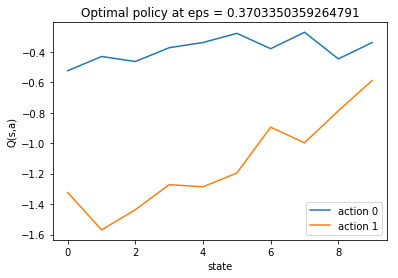

t, eps =  4000 0.3350929977159697


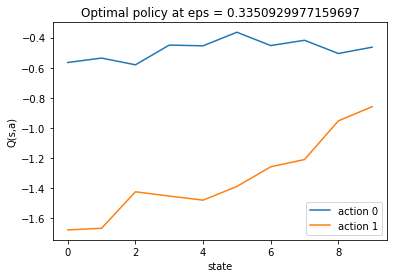

t, eps =  5000 0.3032046828552477


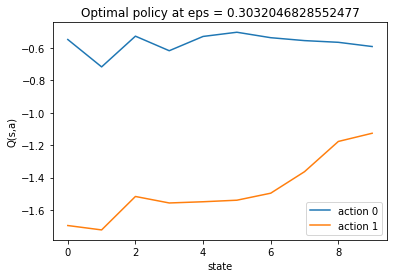

t, eps =  6000 0.2743509423711543


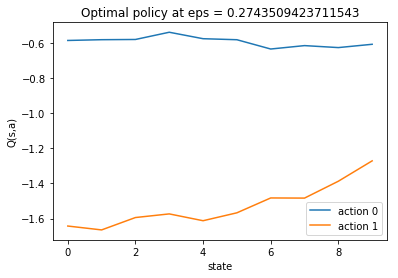

t, eps =  7000 0.2482429983308476


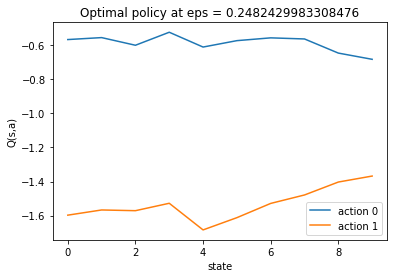

t, eps =  8000 0.22461955365518918


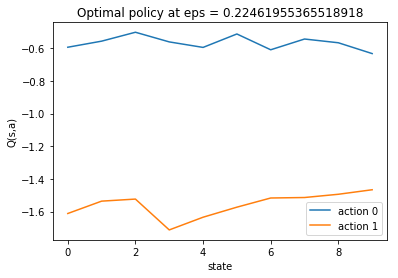

t, eps =  9000 0.20324417696975106


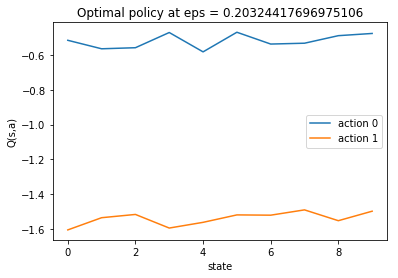

done
ep = 1
t, eps =  0 0.1839029363201532


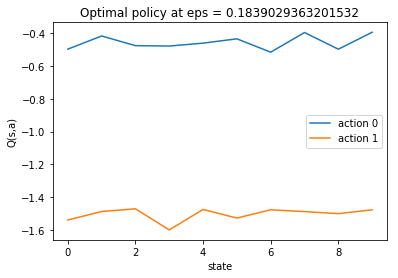

t, eps =  1000 0.1664022580691589


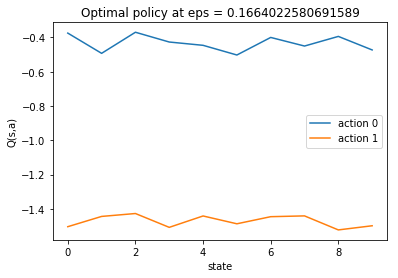

t, eps =  2000 0.15056698954665113


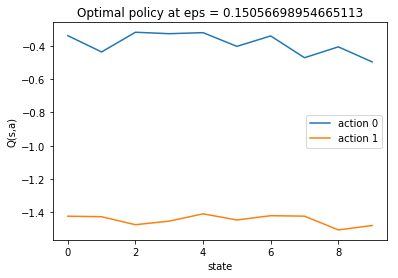

t, eps =  3000 0.13623864606283914


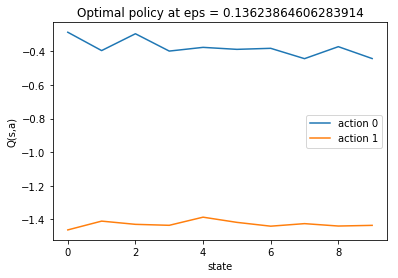

t, eps =  4000 0.12327382474021431


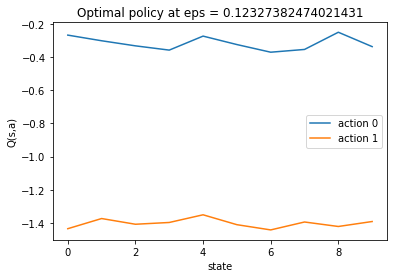

t, eps =  5000 0.11154276928935293


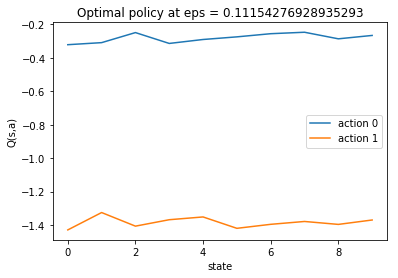

t, eps =  6000 0.10092807136435882


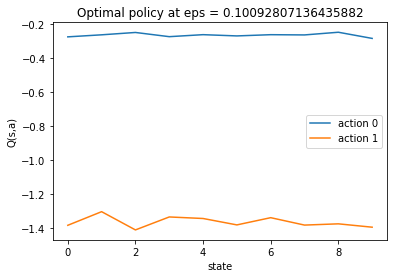

t, eps =  7000 0.09132349550067549


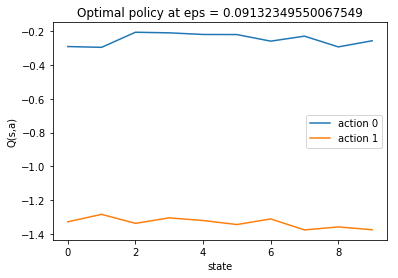

t, eps =  8000 0.08263291587484979


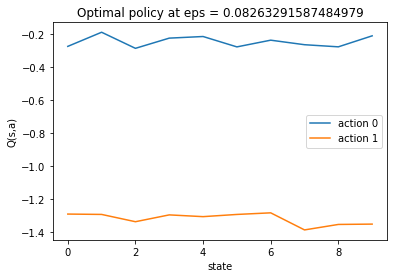

t, eps =  9000 0.07476935424498174


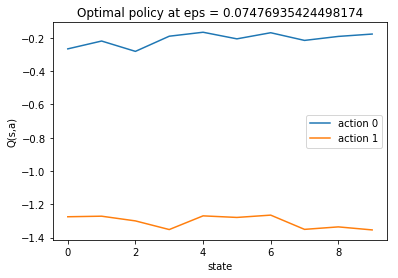

done
ep = 2
t, eps =  0 0.0676541094432453


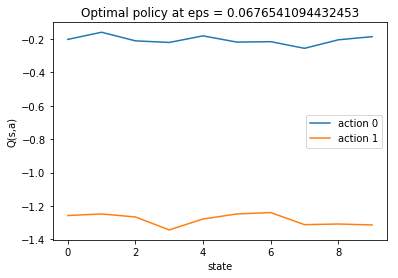

t, eps =  1000 0.0612159697081483


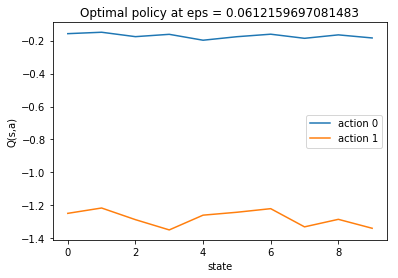

t, eps =  2000 0.05539049997328842


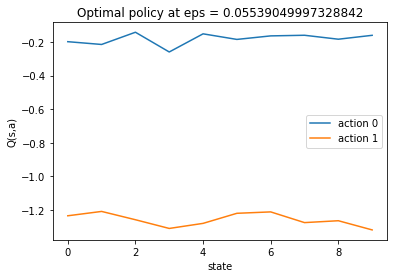

t, eps =  3000 0.05011939697955117


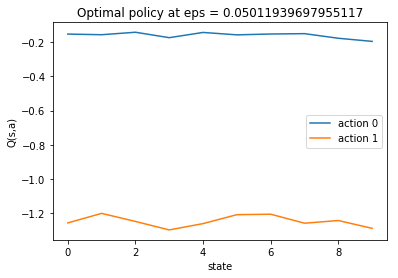

t, eps =  4000 0.045349905756496355


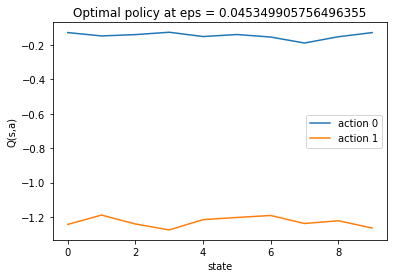

t, eps =  5000 0.041034291632882275


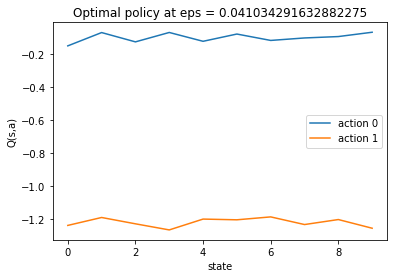

t, eps =  6000 0.037129362492031776


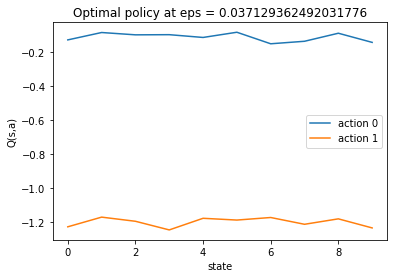

t, eps =  7000 0.03359603649061123


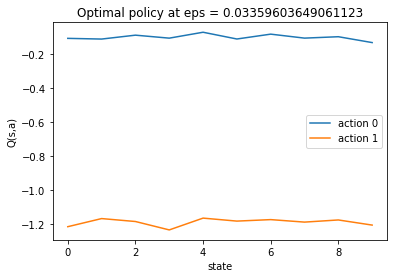

t, eps =  8000 0.03039895091440654


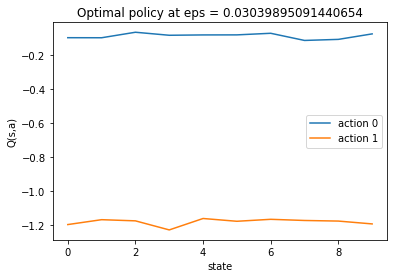

t, eps =  9000 0.027506108256393484


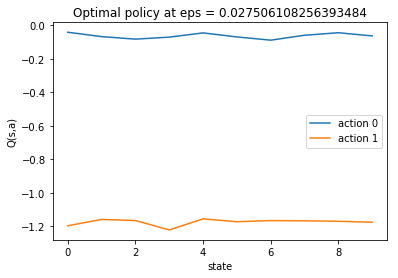

done
ep = 3
t, eps =  0 0.02488855597493268


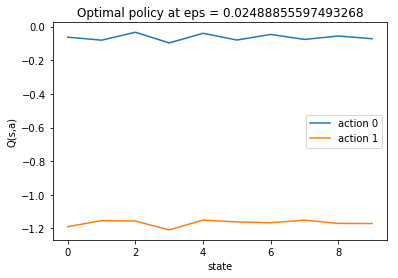

t, eps =  1000 0.02252009672700154


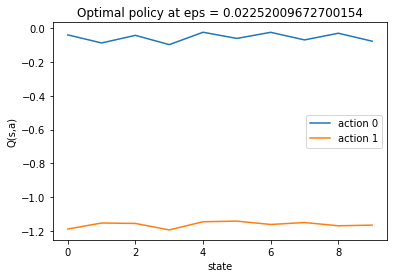

t, eps =  2000 0.020377026176380136


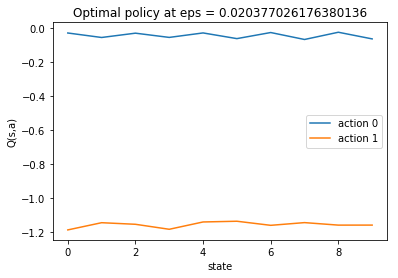

t, eps =  3000 0.01843789575268696


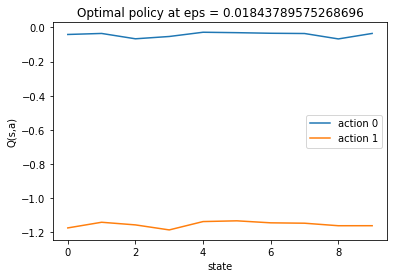

t, eps =  4000 0.016683297986877454


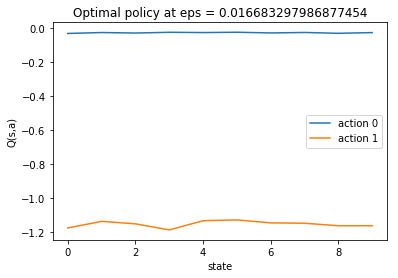

t, eps =  5000 0.015095672274770723


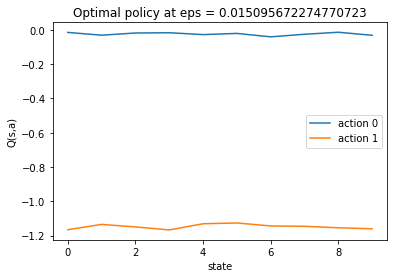

t, eps =  6000 0.01365912912462056


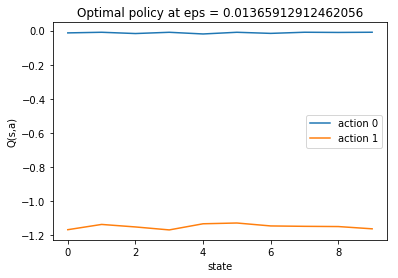

t, eps =  7000 0.012359291129741443


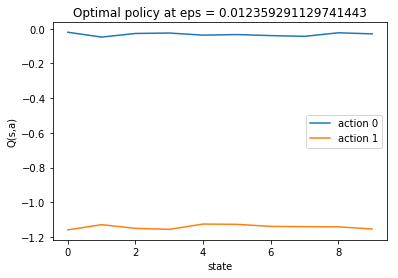

t, eps =  8000 0.011183149074589983


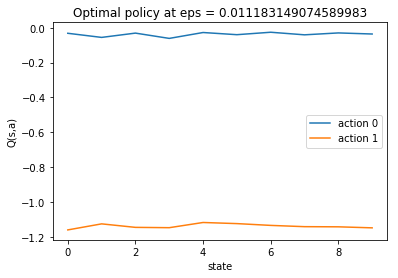

t, eps =  9000 0.010118931734163231


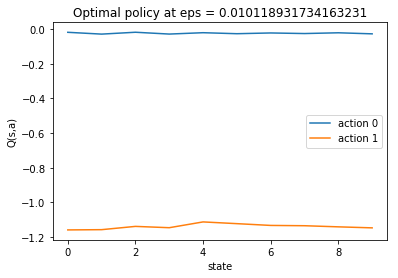

done
ep = 4
t, eps =  0 0.009155988063622392


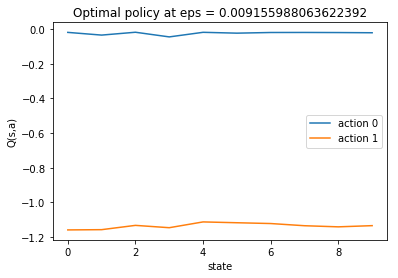

t, eps =  1000 0.008284680599056153


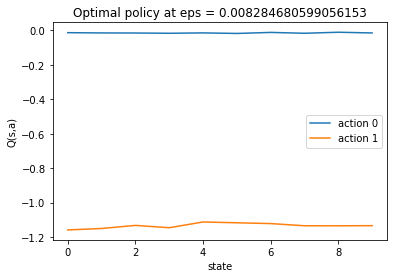

t, eps =  2000 0.0074962890025025725


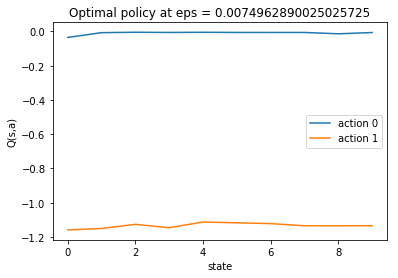

t, eps =  3000 0.006782922785875789


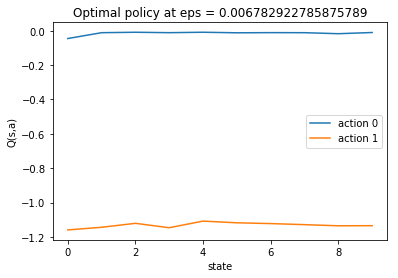

t, eps =  4000 0.006137442340309129


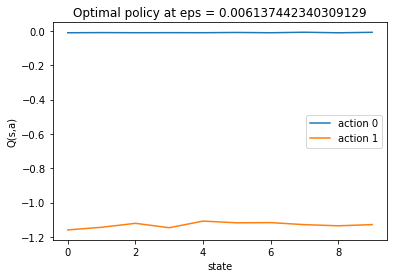

t, eps =  5000 0.005553387480549886


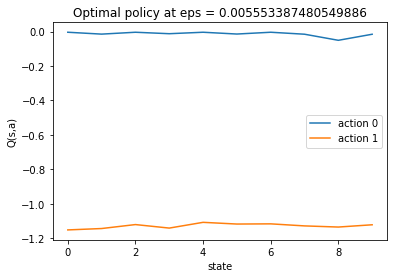

t, eps =  6000 0.005024912789253984


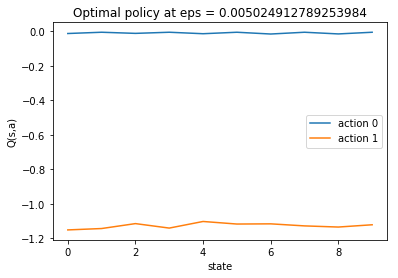

t, eps =  7000 0.004546729114084444


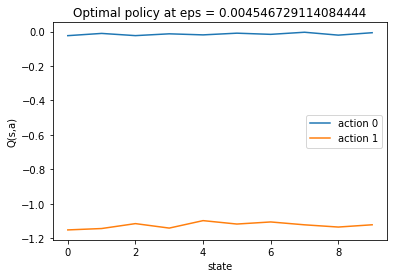

t, eps =  8000 0.004114050632097095


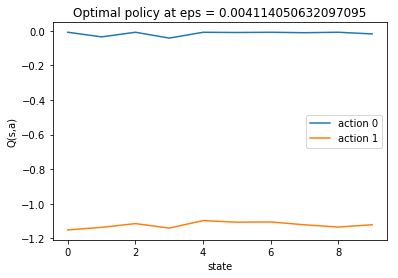

t, eps =  9000 0.0037225469516159447


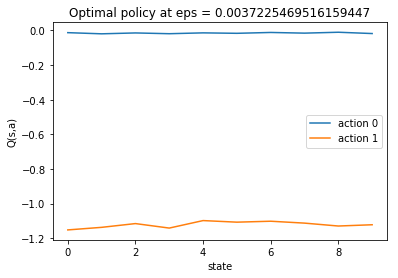

done
ep = 5
t, eps =  0 0.003368299772217802


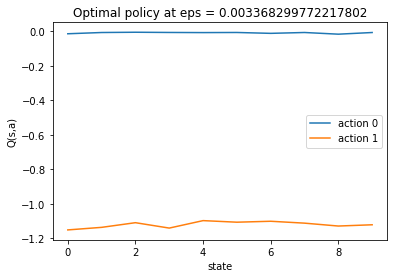

t, eps =  1000 0.0030477636690646676


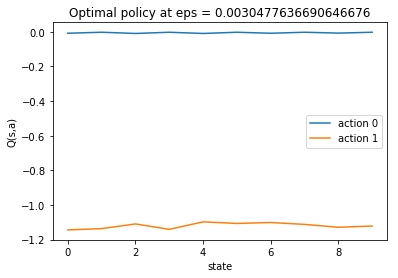

t, eps =  2000 0.0027577306091002753


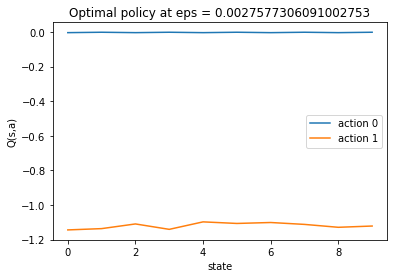

t, eps =  3000 0.002495297843977028


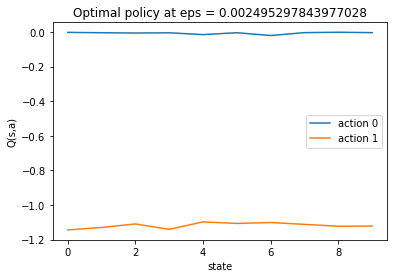

t, eps =  4000 0.0022578388583748715


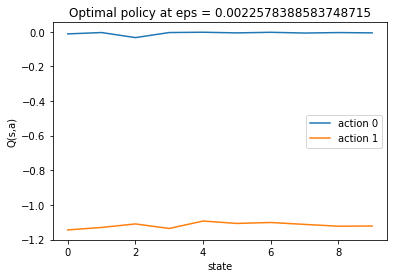

t, eps =  5000 0.002042977082953176


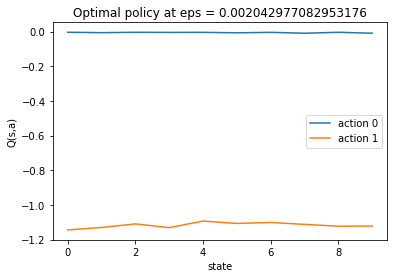

t, eps =  6000 0.001848562108845989


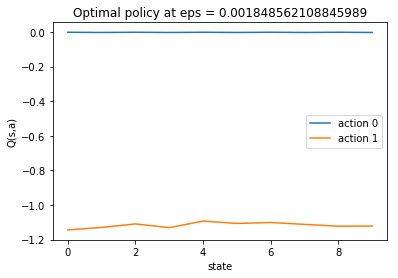

t, eps =  7000 0.0016726481656473124


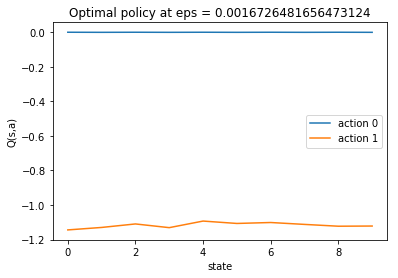

t, eps =  8000 0.0015134746474868986


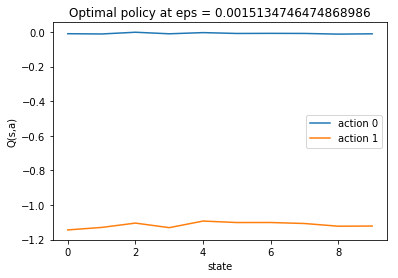

t, eps =  9000 0.00136944849229493


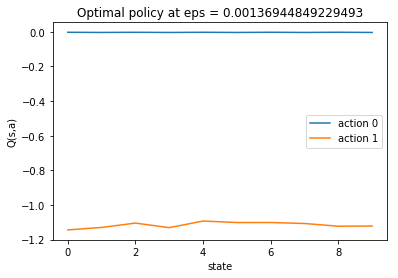

done
ep = 6
t, eps =  0 0.0012391282379013815


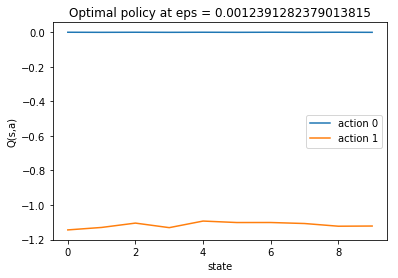

t, eps =  1000 0.0011212095953981346


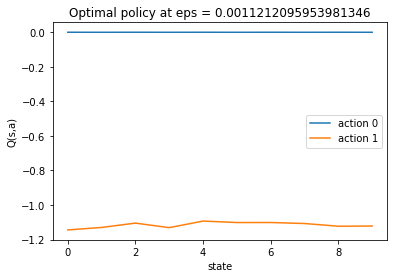

t, eps =  2000 0.0010145123953771904


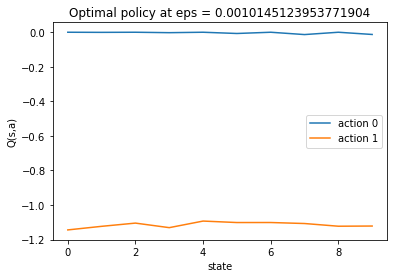

t, eps =  3000 0.0009179687763985739


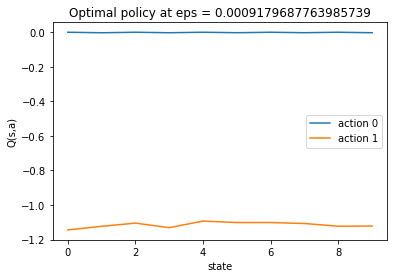

t, eps =  4000 0.0008306124974741151


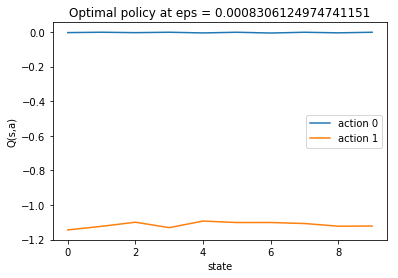

t, eps =  5000 0.0007515692676028778


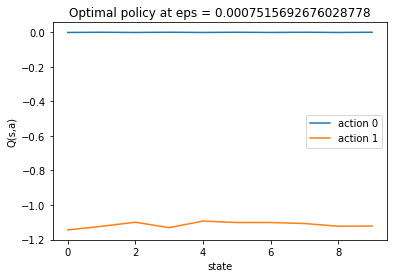

t, eps =  6000 0.0006800479955729654


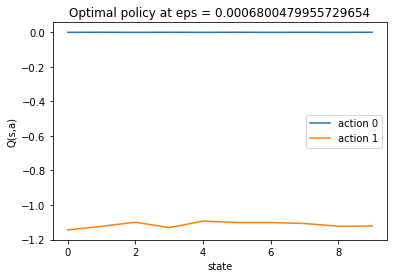

t, eps =  7000 0.0006153328724547713


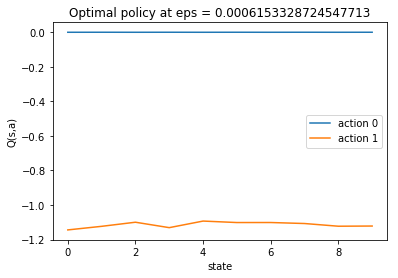

t, eps =  8000 0.0005567762075446259


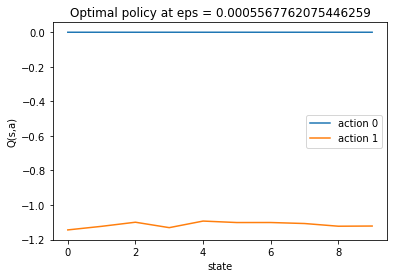

t, eps =  9000 0.000503791946058533


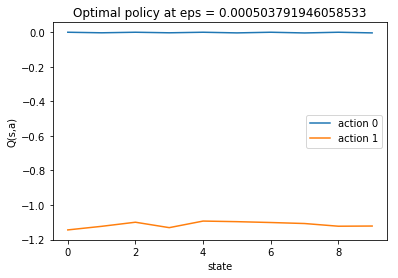

done
ep = 7
t, eps =  0 0.0004558498036989142


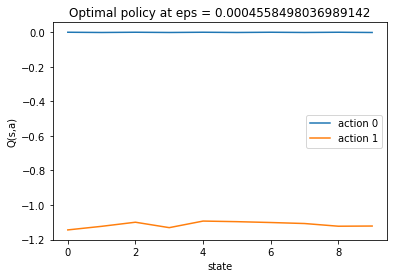

t, eps =  1000 0.0004124699593911247


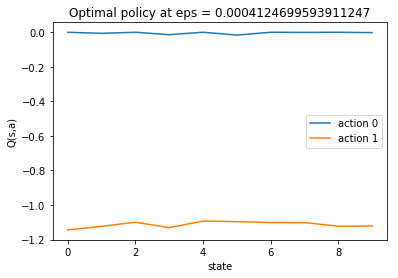

t, eps =  2000 0.0003732182530728622


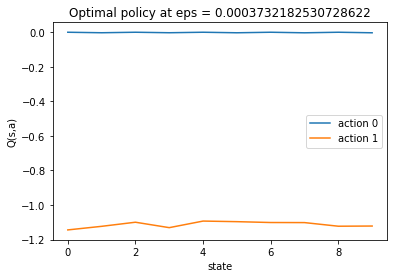

t, eps =  3000 0.00033770184047434007


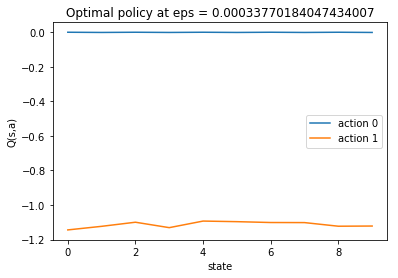

t, eps =  4000 0.0003055652614007932


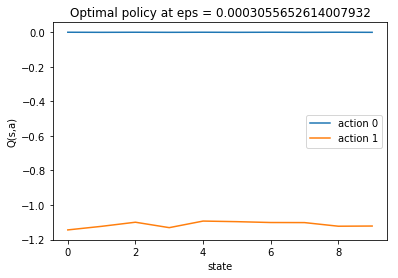

t, eps =  5000 0.0002764868821673769


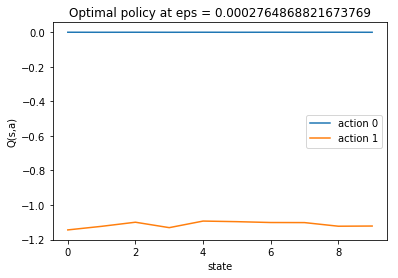

t, eps =  6000 0.00025017567658114196


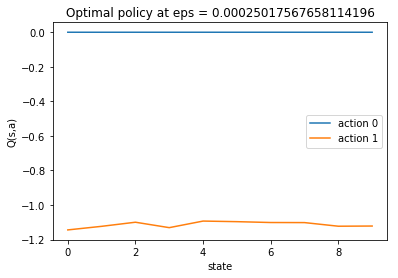

t, eps =  7000 0.00022636831325307968


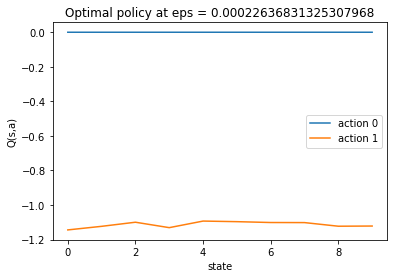

t, eps =  8000 0.00020482652008907198


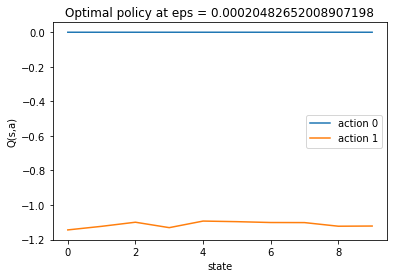

t, eps =  9000 0.0001853346995826864


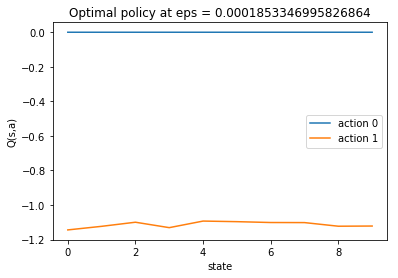

done
ep = 8
t, eps =  0 0.0001676977710428684


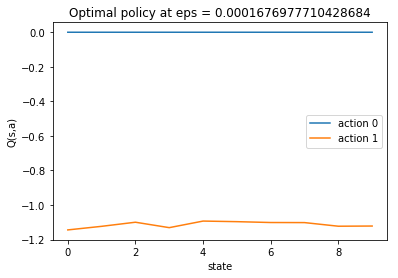

t, eps =  1000 0.00015173921816081433


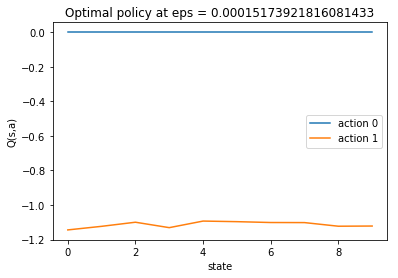

t, eps =  2000 0.00013729932237542647


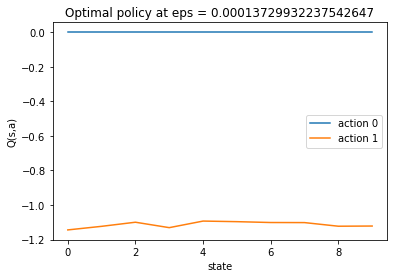

t, eps =  3000 0.0001242335643562678


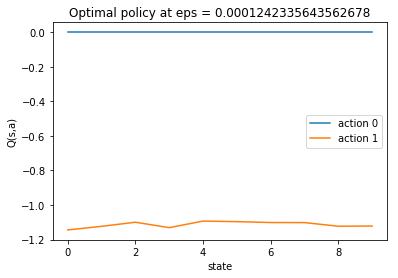

t, eps =  4000 0.0001124111776055296


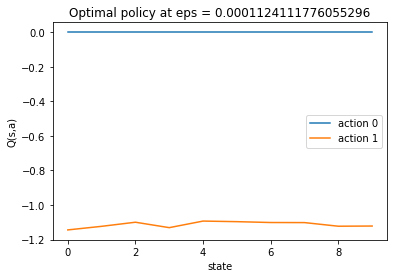

t, eps =  5000 0.00010171383970296912


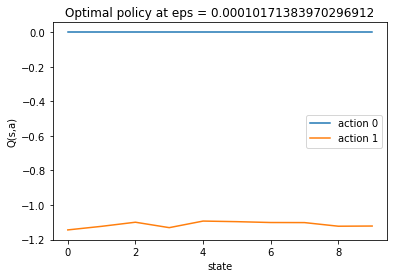

t, eps =  6000 9.203448809535792e-05


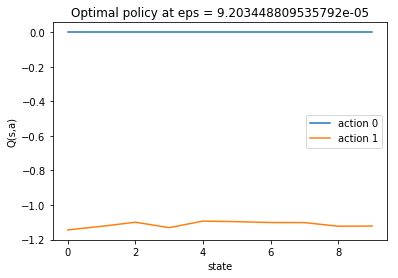

t, eps =  7000 8.327624857846495e-05


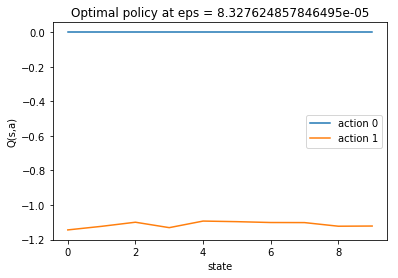

t, eps =  8000 7.5351465747459e-05


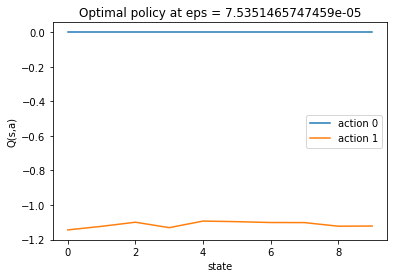

t, eps =  9000 6.818082571215588e-05


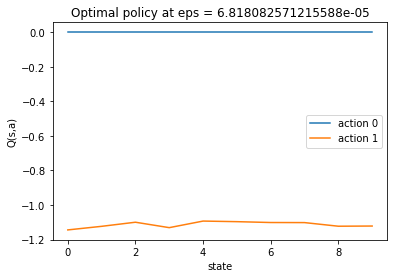

done
ep = 9
t, eps =  0 6.16925622969468e-05


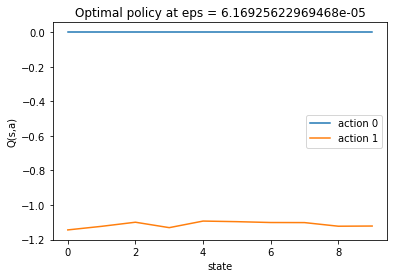

t, eps =  1000 5.582173878079195e-05


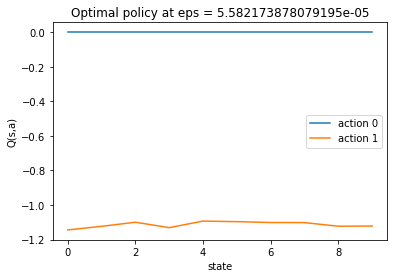

t, eps =  2000 5.05095979886896e-05


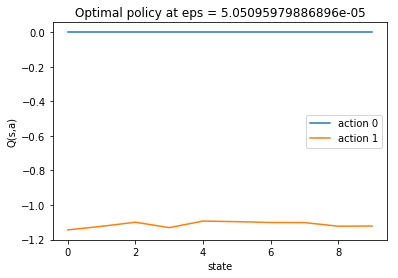

t, eps =  3000 4.570297423012021e-05


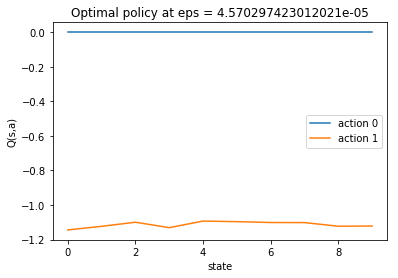

t, eps =  4000 4.135376119894598e-05


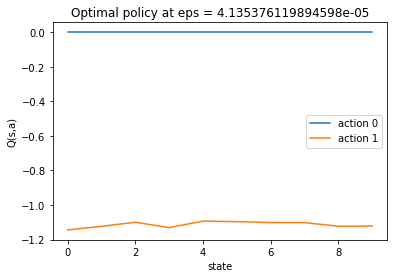

t, eps =  5000 3.741843050932988e-05


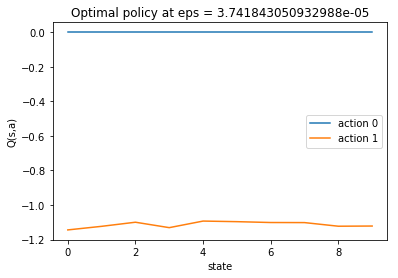

t, eps =  6000 3.3857596049020034e-05


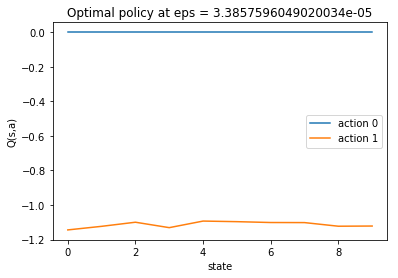

t, eps =  7000 3.06356197898998e-05


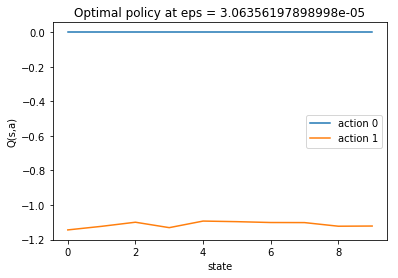

t, eps =  8000 2.7720255110624295e-05


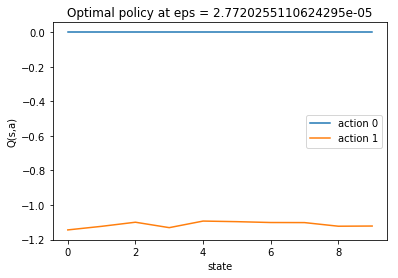

t, eps =  9000 2.508232406159541e-05


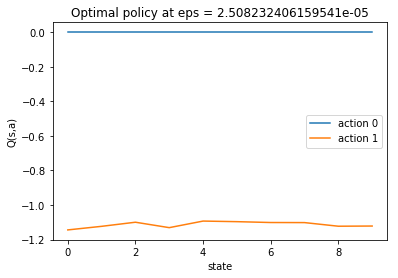

done


In [6]:
# pdb.set_trace()
agent = AgentNstepSARSA(env, no_steps=2, eps=0.5, epsDecay=True)
n = agent.no_steps
for ep in range(10):
    print('ep = ' + str(ep))
    state = env.reset()
    action = agent.chooseActionEps(state)
    agent.state_memory[0], agent.action_memory[0] =  state, action
    T = 10000
    for t in range(T):
        if(t < T):
            state, reward, done, _ = env.step(action)
            agent.state_memory[t+1], agent.reward_memory[t+1] = state, reward
            if(done):
                print("done")
                T = t + 1
            else:
                action = agent.chooseActionEps(state)
                agent.action_memory[t+1] = action
        tau  = t - n + 1
        if(tau>=0):
            rewardsVector = agent.reward_memory[tau+1:np.minimum(tau+n,T)]
            discountingVector = np.power(agent.gamma, np.arange(0, rewardsVector.shape[0]))
            G = np.sum(np.multiply(rewardsVector, discountingVector))
            if(tau + n < T):
                G = G + agent.gamma**n * agent.Q[agent.state_memory[tau + n].astype('int'), agent.action_memory[tau+n].astype('int')]
            agent.Q[agent.state_memory[tau].astype('int'), agent.action_memory[tau].astype('int')] += agent.alpha * (G - agent.Q[agent.state_memory[tau].astype('int'), agent.action_memory[tau].astype('int')])
                
        if(tau==T-1):
            break
            
        if(t%1000==0):
            print('t, eps = ', t, agent.epst)
            plt.plot(agent.Q[:,0], label='action 0')
            plt.plot(agent.Q[:,1], label='action 1')
            plt.xlabel('state'), plt.ylabel('Q(s,a)'),plt.title('Optimal policy at eps = ' + str(agent.epst))
            plt.legend(), plt.show()

## SARSA

vanilla implementation 

ep = 0
t, eps =  0 0.05


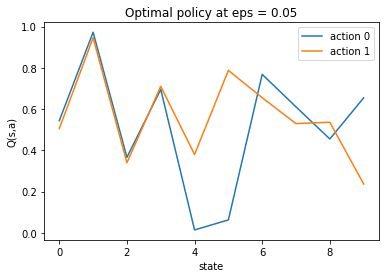

t, eps =  1000 0.05


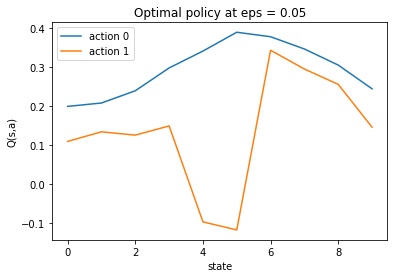

t, eps =  2000 0.05


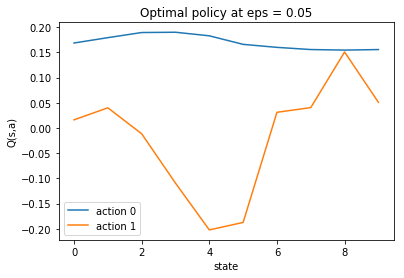

t, eps =  3000 0.05


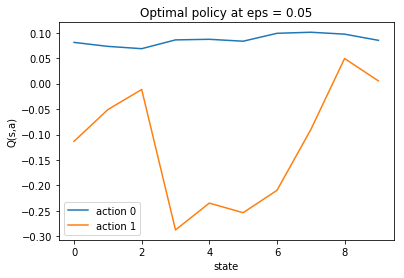

t, eps =  4000 0.05


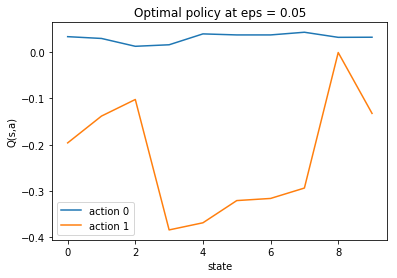

t, eps =  5000 0.05


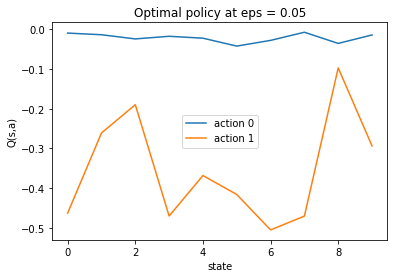

t, eps =  6000 0.05


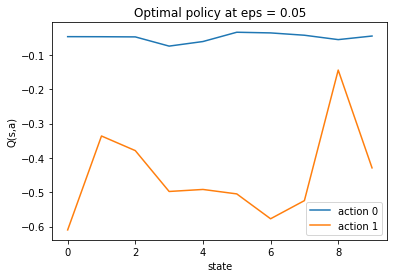

t, eps =  7000 0.05


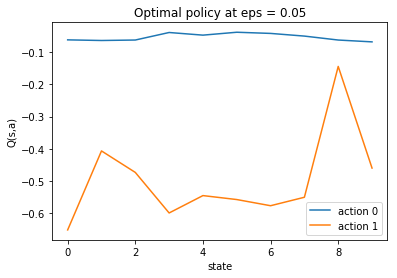

t, eps =  8000 0.05


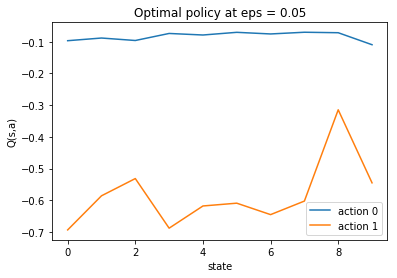

t, eps =  9000 0.05


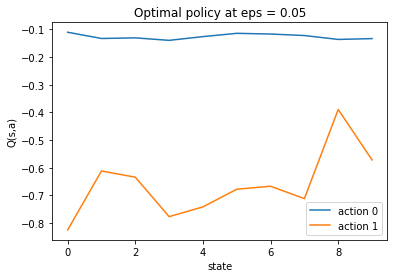

ep = 1
t, eps =  0 0.05


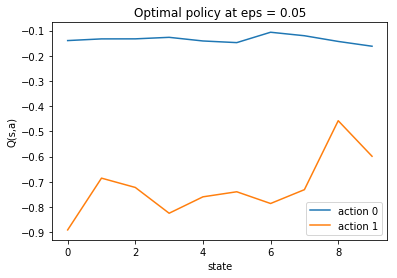

t, eps =  1000 0.05


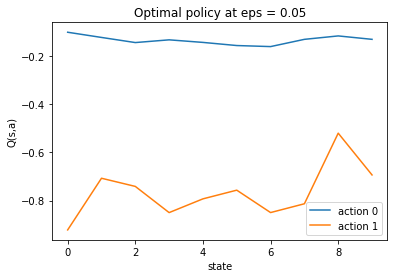

t, eps =  2000 0.05


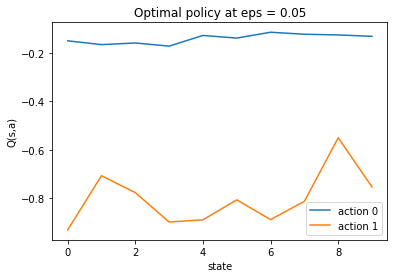

t, eps =  3000 0.05


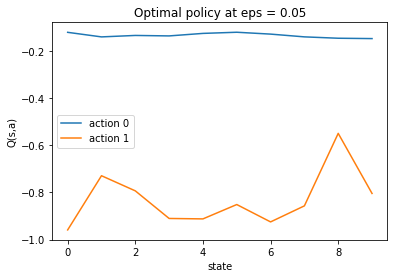

t, eps =  4000 0.05


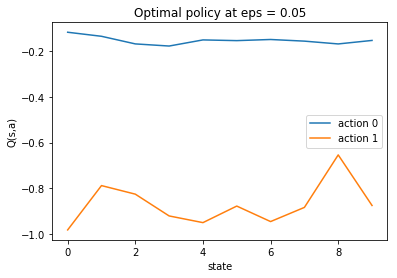

t, eps =  5000 0.05


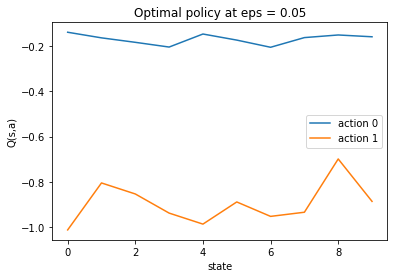

t, eps =  6000 0.05


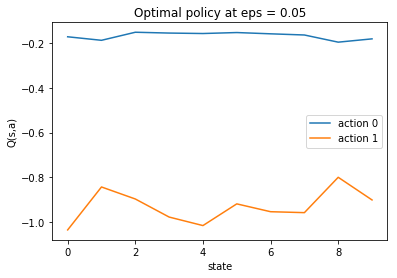

t, eps =  7000 0.05


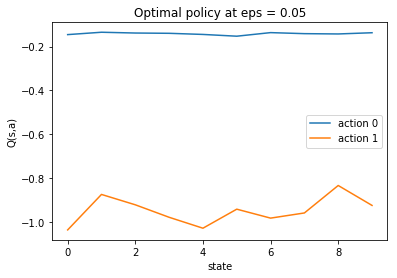

t, eps =  8000 0.05


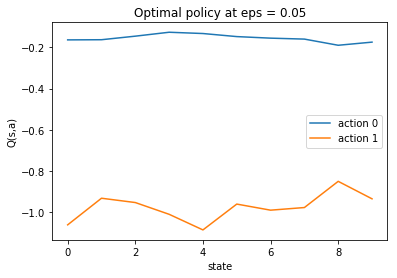

t, eps =  9000 0.05


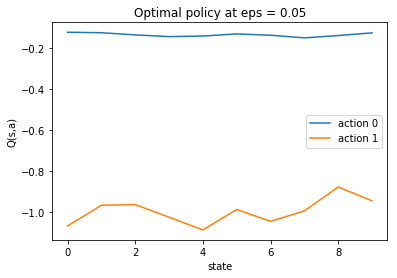

ep = 2
t, eps =  0 0.05


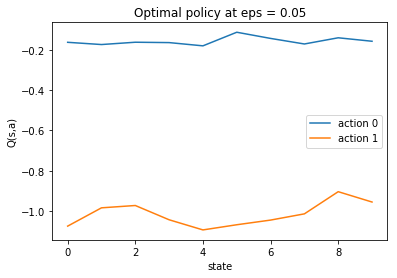

t, eps =  1000 0.05


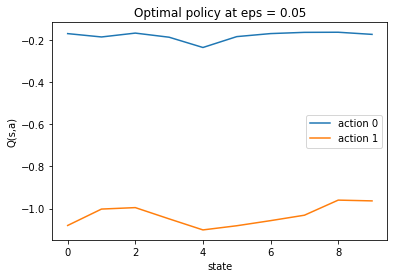

t, eps =  2000 0.05


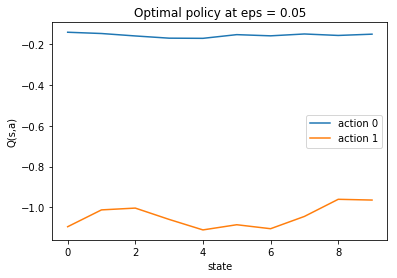

t, eps =  3000 0.05


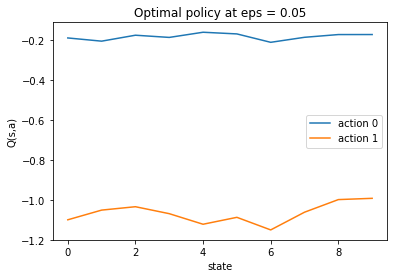

t, eps =  4000 0.05


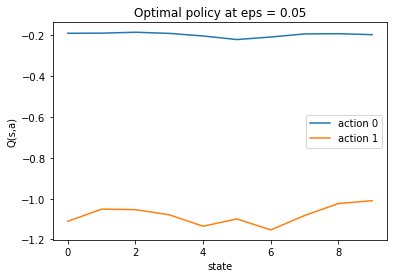

t, eps =  5000 0.05


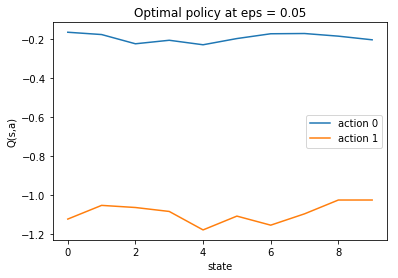

t, eps =  6000 0.05


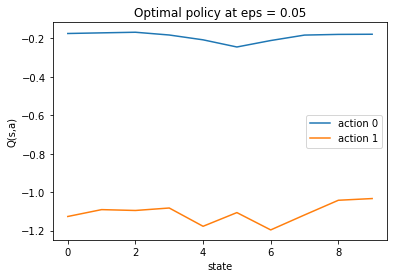

t, eps =  7000 0.05


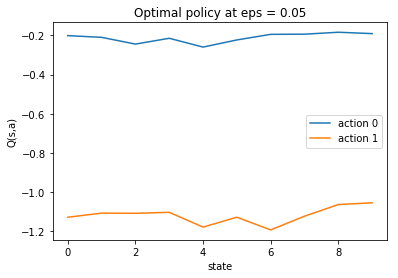

t, eps =  8000 0.05


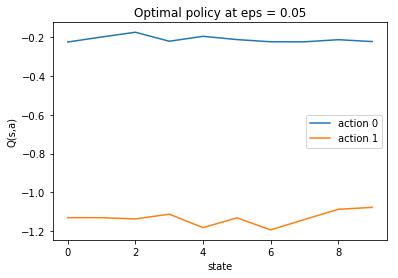

t, eps =  9000 0.05


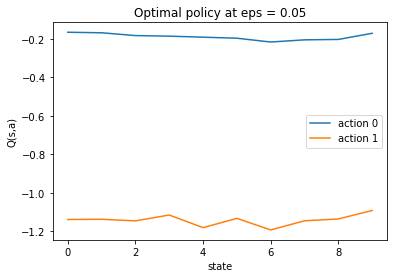

ep = 3
t, eps =  0 0.05


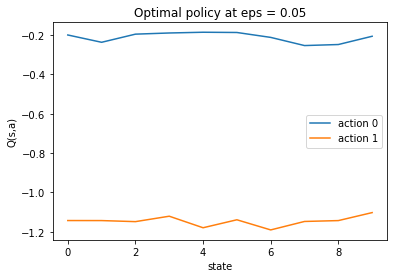

t, eps =  1000 0.05


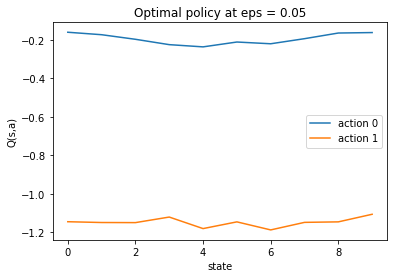

t, eps =  2000 0.05


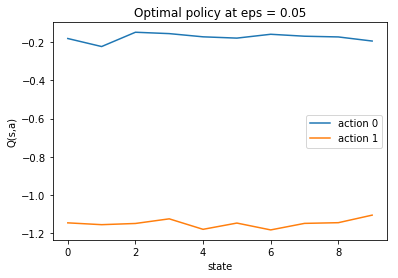

t, eps =  3000 0.05


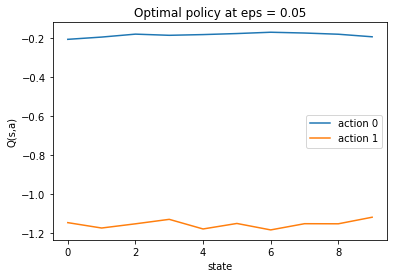

t, eps =  4000 0.05


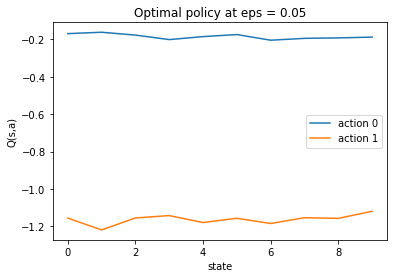

t, eps =  5000 0.05


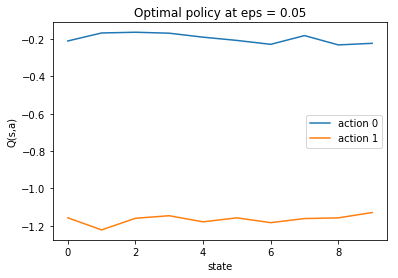

t, eps =  6000 0.05


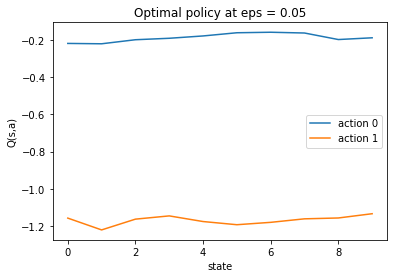

t, eps =  7000 0.05


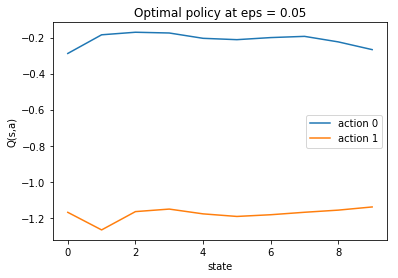

t, eps =  8000 0.05


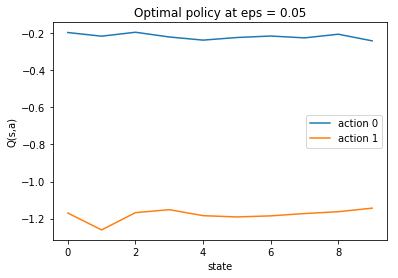

t, eps =  9000 0.05


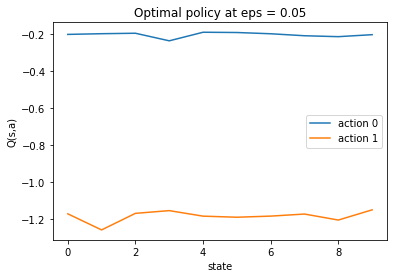

ep = 4
t, eps =  0 0.05


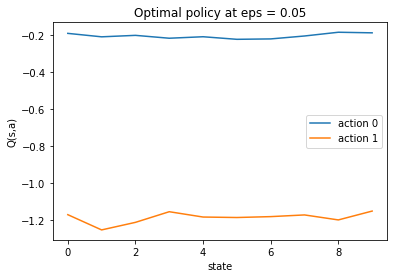

t, eps =  1000 0.05


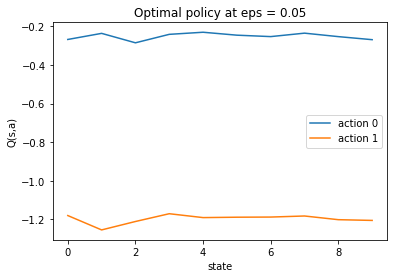

t, eps =  2000 0.05


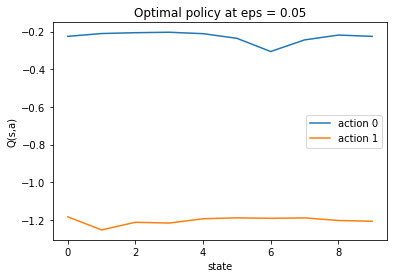

t, eps =  3000 0.05


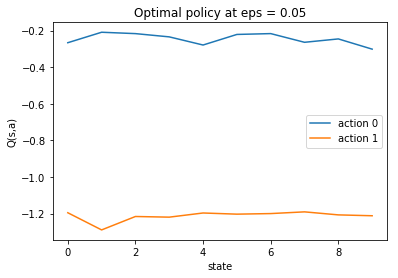

t, eps =  4000 0.05


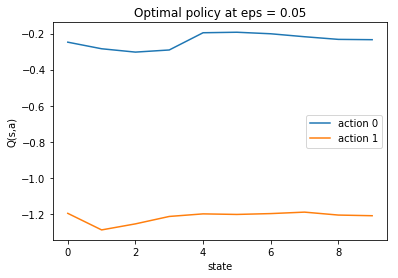

t, eps =  5000 0.05


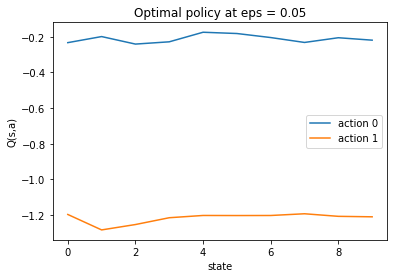

t, eps =  6000 0.05


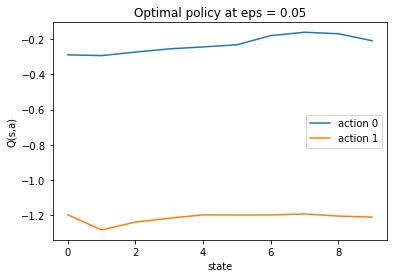

t, eps =  7000 0.05


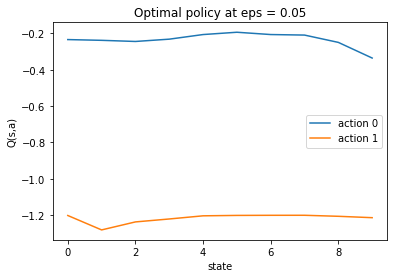

t, eps =  8000 0.05


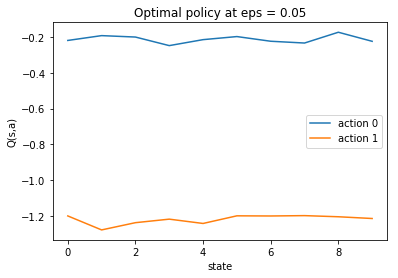

t, eps =  9000 0.05


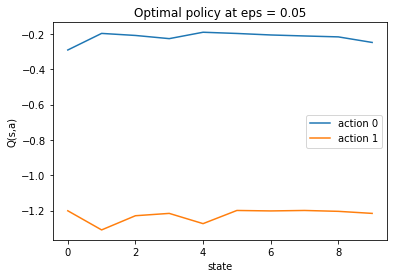

In [12]:
agent = AgentSARSA(env, epsDecay=False, eps=0.05, beta=0)
MSE = []
for ep in range(5):
    print('ep = ' + str(ep))
    state = env.reset()
    action = agent.chooseActionEps(state)
    agent.initializeP(state)
    T = 10000
    for t in range(T):
        state2, reward, done, _ = env.step(action)
        action2 = agent.chooseActionEps(state2)
        agent.updatePolicySARSA(state, action, reward, state2, action2)
        MSE.append(np.square(agent.Q - env.optimalQ).mean())
        state, action = state2, action2
        if(done):
            break
            
        if(t%1000==0):
            print('t, eps = ', t, agent.epst)
            plt.plot(agent.Q[:,0], label='action 0')
            plt.plot(agent.Q[:,1], label='action 1')
            plt.xlabel('state'), plt.ylabel('Q(s,a)'),plt.title('Optimal policy at eps = ' + str(agent.epst))
            plt.legend(), plt.show()
            

implementation in a function

In [14]:
def runSARSA(env, agent):
    MSE = []
    for ep in range(1):
        print('ep = ' + str(ep))
        state = env.reset()
        action = agent.chooseActionEps(state)
        agent.initializeP(state)
        T = 10000
        for t in range(T):
            state2, reward, done, _ = env.step(action)
            action2 = agent.chooseActionEps(state2)
            agent.updatePolicySARSA(state, action, reward, state2, action2)
            MSE.append(np.square(agent.Q - env.optimalQ).mean())
            state, action = state2, action2
            if(done):
                break
    return MSE

ep = 0
ep = 0
ep = 0
ep = 0
ep = 0


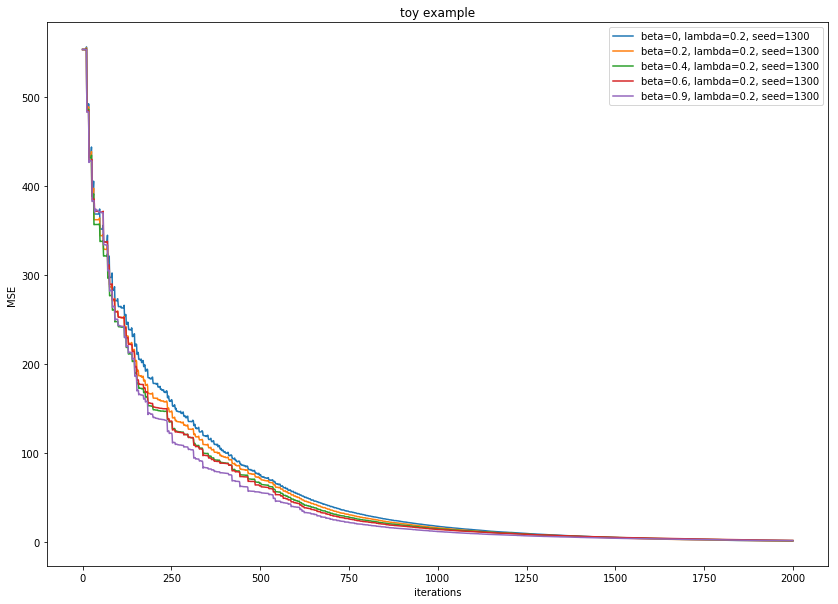

In [38]:
seed = 1300
plt.figure(figsize=(14,10))
for beta in [0, 0.2, 0.4, 0.6, 0.9]:
    agent = AgentSARSA(env, epsDecay=True, eps=0.5, beta=beta, lambd=0.2,alpha=0.1)
    agent.Q = env.optimalQ.copy()
    np.random.seed(seed)
    agent.Q[4:6,:] = np.random.rand(2,2)*100
    MSE = runSARSA(env, agent)
    plt.plot(MSE[:2000], label='beta={}, lambda={}, seed={}'.format(beta, 0.2, seed))
plt.legend(), plt.xlabel('iterations'), plt.ylabel('MSE'), plt.title('toy example')
plt.show()